In [3]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [4]:
df_pr = pd.read_csv('OPENAIERC-USD.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

### Selecting Features and Target Variables

In [5]:
#Set Target Variable
output_var = pd.DataFrame(df_pr['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

### Applying MinMax Scaler to scale the data for training

In [6]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_pr[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_pr.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2022-12-07,0.054993,0.017562,0.281868,0.027154
2022-12-08,0.117105,0.210946,0.506276,0.523185
2022-12-09,0.169218,0.156699,0.926643,0.199689
2022-12-10,1.000000,1.000000,0.701242,1.000000
2022-12-11,0.228029,0.439380,0.541149,0.354564


#### Time Series Split:
To accomplish this, we will employ the TimeSeriesSplit class from the sci-kit-learn library. We will configure the number of splits to be 10, indicating that 10% of the data will serve as the test set, while the remaining 90% will train the LSTM model. The advantage of employing this Time Series split lies in its examination of data samples at regular time intervals.

In [7]:
timesplit= TimeSeriesSplit(n_splits=10)  #10% data for testing and 90% for training
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [8]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

#### Building the model
Model Architecture: A Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

In [9]:
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

### Training the LSTM model

In [10]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
35/35 [==============================] - 10s 35ms/step - loss: 6.9424e-04
Epoch 2/100
35/35 [==============================] - 1s 23ms/step - loss: 2.9942e-04: 0s - loss: 3.3072e
Epoch 3/100
35/35 [==============================] - 1s 22ms/step - loss: 2.6444e-04
Epoch 4/100
35/35 [==============================] - 1s 25ms/step - loss: 2.2145e-04
Epoch 5/100
35/35 [==============================] - 1s 21ms/step - loss: 1.9415e-04
Epoch 6/100
35/35 [==============================] - 1s 20ms/step - loss: 1.6958e-04
Epoch 7/100
35/35 [==============================] - 1s 21ms/step - loss: 1.5126e-04: 0s - loss: 1.6094e-
Epoch 8/100
35/35 [==============================] - 1s 25ms/step - loss: 1.3376e-04
Epoch 9/100
35/35 [==============================] - 1s 25ms/step - loss: 1.2126e-04
Epoch 10/100
35/35 [==============================] - 1s 21ms/step - loss: 1.1128e-04
Epoch 11/100
35/35 [==============================] - 1s 27ms/step - loss: 1.0445e-04
Epoch 12/100
35/35 [=

In [11]:
#predictions
y_pred= lstm.predict(X_test)

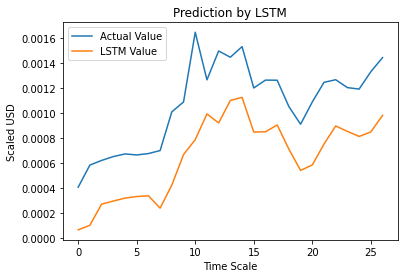

In [12]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='Actual Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()